In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## Question 1

For the image toys.gif

**A)** Read and display the image.  
**B)** Compute the 2-D FFT of the image and display one full-scaled copy of the magnitude spectrum.  

<img src="toys.gif" width="200" height="200"/>

#### A)

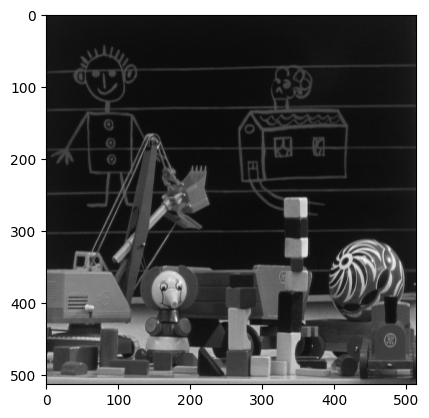

In [53]:
cap = cv.VideoCapture("toys.gif")
ret, toys_image = cap.read()
toys_image = cv.cvtColor(toys_image, cv.COLOR_BGR2GRAY)
cap.release()
toys_image = np.pad(toys_image, 1, mode='symmetric')

plt.imshow(toys_image, cmap='gray')

#### B)

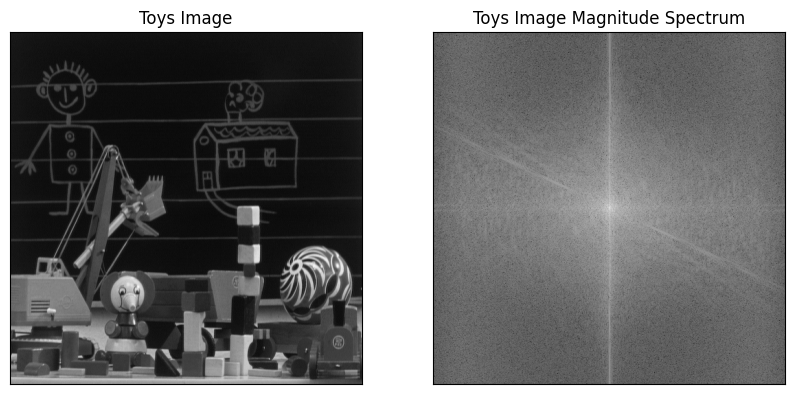

In [54]:
toys_fourier = cv.dft(np.float32(toys_image), flags=cv.DFT_COMPLEX_OUTPUT)

toys_fourier_shift = np.fft.fftshift(toys_fourier)

# calculate the magnitude of the Fourier Transform
toys_image_magnitude = 20 * np.log(cv.magnitude(toys_fourier_shift[:, :, 0], toys_fourier_shift[:, :, 1]))

# Scale the magnitude for display
toys_image_magnitude = cv.normalize(toys_image_magnitude, None, 0, 255, cv.NORM_MINMAX, cv.CV_8UC1)

# visualize the original image and the magnitude spectrum
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(toys_image, cmap='gray')
plt.title('Toys Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(toys_image_magnitude, cmap='gray')
plt.title('Toys Image Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Question 2

For the image pepper.jpg, it is required to study the ringing effect of the Butterworth lowpass filter. Design the following filters and investigate the effect of changing the filter order and cutoff frequency on ringing. You need to display the filtered images and the shape of the filters in the spatial domain. A cross-sectional view of the filters in the spatial domain is required. Make sure to display the figures in a neat and organized way.

| Filter Number | Order | Cutoff Frequency |
|----------|----------|----------|
| 1 | 1 | 50 |
| 2 | 1 | 150 |
| 3 | 5 | 50 |
| 4 | 5 | 150 |

<img src="pepper.jpg" width="200" height="200"/>

In [55]:
def butterworth_filter(shape, cutoff, order, btype='low'):
    P, Q = shape
    U, V = np.meshgrid(np.arange(-P//2, P//2), np.arange(-Q//2, Q//2), sparse=False, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    if btype == 'low':
        H = 1 / (1 + (D / cutoff)**(2 * order))
    elif btype == 'high':
        H = 1 / (1 + (cutoff / D)**(2 * order))
    return H

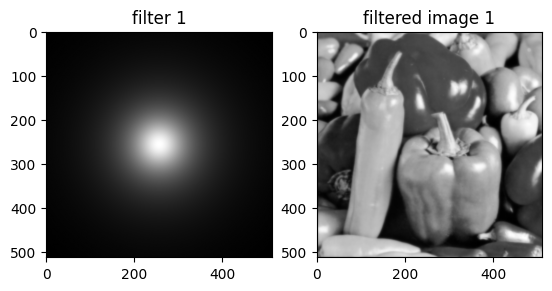

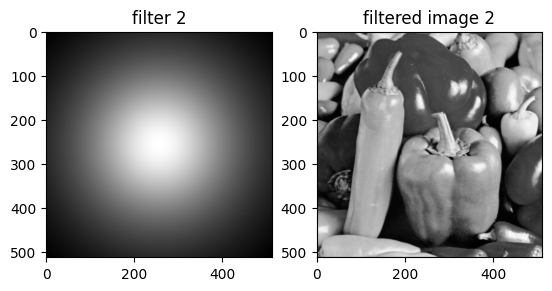

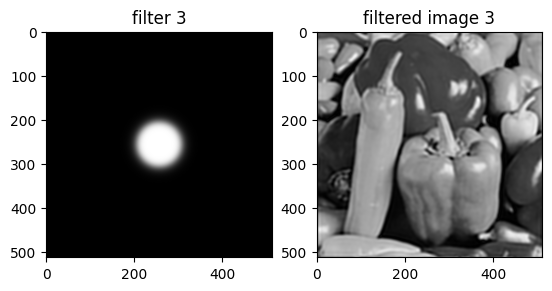

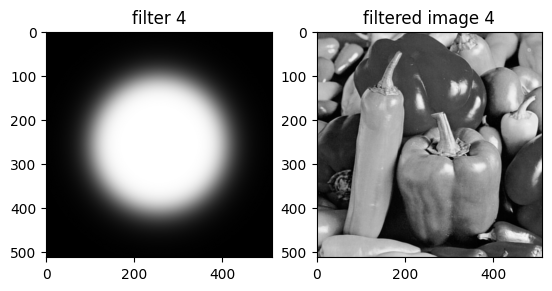

In [56]:
pepper_image = cv.imread("pepper.jpg", cv.IMREAD_GRAYSCALE)

pepper_fourier_transform = np.fft.fft2(pepper_image)

pepper_fourier_shift = np.fft.fftshift(pepper_fourier_transform)

for i, filter_data in enumerate([(1,50),(1,150),(5,50),(5,150)]):
    order, freq = filter_data
    butter_filter = butterworth_filter(pepper_image.shape, freq, order, btype='low')
    pepper_filtered_fourier_shift = pepper_fourier_shift * butter_filter
    pepper_filtered_fourier = np.fft.ifftshift(pepper_filtered_fourier_shift)
    pepper_filtered = np.fft.ifft2(pepper_filtered_fourier)
    pepper_filtered = np.abs(pepper_filtered)
    f_pepper, pepper_subplots = plt.subplots(ncols=2)
    pepper_subplots[0].imshow(np.log1p(np.abs(butter_filter)), cmap='gray')
    pepper_subplots[0].set_title(f"filter {i+1}")
    pepper_subplots[1].imshow(pepper_filtered, cmap='gray')
    pepper_subplots[1].set_title(f"filtered image {i+1}")



## Question 3

For the image prob2_s2012.gif

**A)** Compute and display the magnitude spectrum of the image.     
**B)** Investigate the image in the spatial and frequency domains and determine the type of noise that is corrupting the image.     
**C)** Design the proper filter and use it to restore the original image.       
**D)** Based on the filter in part C, can you display the noise component in the spatial domain? If so, show the image that represents the noise.


<img src="prob2_s2012.gif" width="200" height="200"/>

#### A)

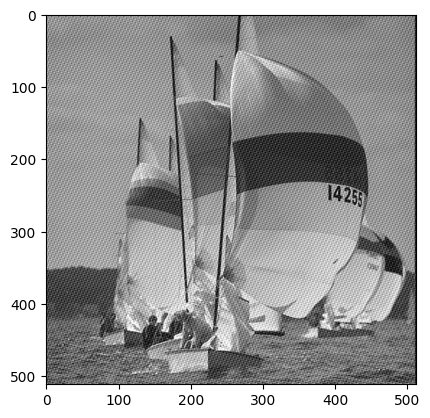

In [57]:
cap = cv.VideoCapture("prob2_s2012.gif")
ret, boat_image = cap.read()
boat_image = cv.cvtColor(boat_image, cv.COLOR_BGR2GRAY)
cap.release()
plt.imshow(boat_image, cmap='gray')


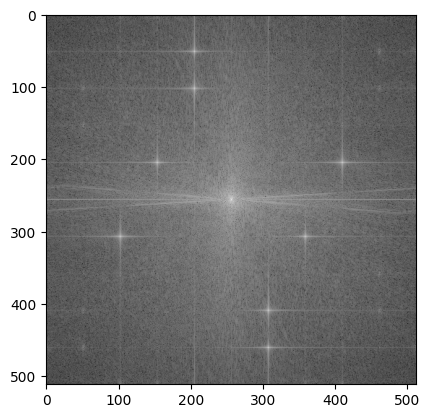

In [58]:
boat_image_fourier = np.fft.fft2(boat_image)
boat_image_fourier_shift = np.fft.fftshift(boat_image_fourier)
plt.imshow(np.log1p(np.abs(boat_image_fourier_shift)), cmap='gray')

#### B)

the noise if of the priodic noise type and can be removed using butterworth or gaussian filter

#### C)

Text(0.5, 1.0, 'filter')

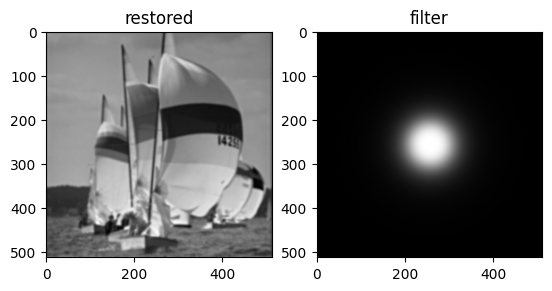

In [59]:
boat_filter = butterworth_filter(boat_image.shape, 50, 2, btype='low')
boat_image_filtered_fourier_shift = boat_image_fourier_shift * boat_filter
boat_image_filtered_fourier = np.fft.ifftshift(boat_image_filtered_fourier_shift)
boat_image_filtered = np.fft.ifft2(boat_image_filtered_fourier)
boat_image_filtered = np.abs(boat_image_filtered)
f_boat_image, boat_image_subplots = plt.subplots(ncols=2)
boat_image_subplots[0].imshow(boat_image_filtered, cmap='gray')
boat_image_subplots[0].set_title("restored")
boat_image_subplots[1].imshow(np.log1p(np.abs(boat_filter)), cmap='gray')
boat_image_subplots[1].set_title("filter")

#### D)
this can be done using the highpass version of the used filter in the previous part

C:\Users\mahdi\AppData\Local\Temp\ipykernel_15704\3116091264.py:8: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (cutoff / D)**(2 * order))


Text(0.5, 1.0, 'high pass filter')

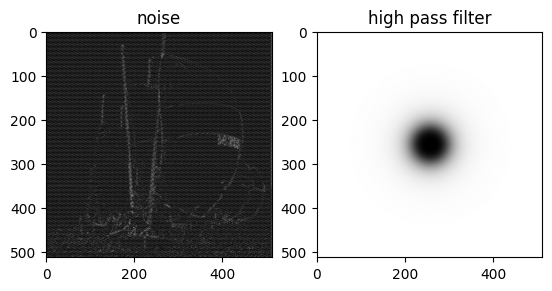

In [60]:
boat_filter_high = butterworth_filter(boat_image.shape, 50 , 2, btype='high')
boat_image_high_filtered_fourier_shift = boat_image_fourier_shift * boat_filter_high
boat_image_high_filtered_fourier = np.fft.ifftshift(boat_image_high_filtered_fourier_shift)
boat_image_high_filtered = np.fft.ifft2(boat_image_high_filtered_fourier)
boat_image_high_filtered = np.abs(boat_image_high_filtered)
f_boat_image, boat_image_subplots = plt.subplots(ncols=2)
boat_image_subplots[0].imshow(boat_image_high_filtered, cmap='gray')
boat_image_subplots[0].set_title("noise")
boat_image_subplots[1].imshow(np.log1p(np.abs(boat_filter_high)), cmap='gray')
boat_image_subplots[1].set_title("high pass filter")

## Question 4

For the image trucknoise.gif

**A)** Display the magnitude spectrum of the image.     
**B)** Determine the type of noise in the frequency domain.     
**C)** Can you remove the noise? Which type of filter is needed?        
**D)** Display the noise-removed image and compute the PSNR of the image (truck.gif is the original image)


<div style="display: flex;">
    <img src="truck.gif" alt="Image 1" width="200" height="200"/>
    <img src="trucknoise.gif" alt="Image 2" width="200" height="200"/>
</div>


#### A)

Text(0.5, 1.0, 'noise')

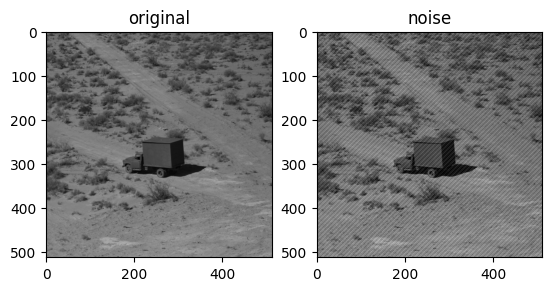

In [61]:
cap = cv.VideoCapture("truck.gif")
ret, truck_image = cap.read()
truck_image = cv.cvtColor(truck_image, cv.COLOR_BGR2GRAY)
cap.release()

cap = cv.VideoCapture("trucknoise.gif")
ret, truck_noise_image = cap.read()
truck_noise_image = cv.cvtColor(truck_noise_image, cv.COLOR_BGR2GRAY)
cap.release()

f_truck_image, truck_image_subplots = plt.subplots(ncols=2)
truck_image_subplots[0].imshow(truck_image, cmap='gray')
truck_image_subplots[0].set_title("original")
truck_image_subplots[1].imshow(truck_noise_image, cmap='gray')
truck_image_subplots[1].set_title("noise")

Text(0.5, 1.0, 'truck frequency domain')

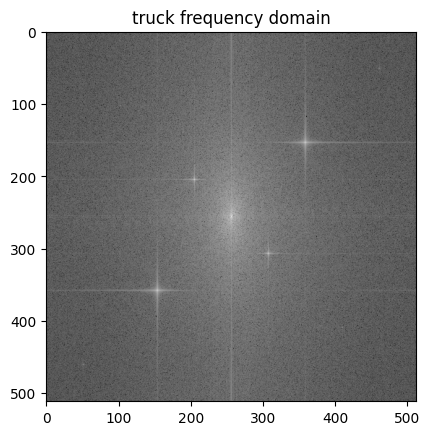

In [62]:
truck_noise_image_fourier = np.fft.fft2(truck_noise_image)
truck_noise_image_fourier_shift = np.fft.fftshift(truck_noise_image_fourier)
plt.imshow(np.log1p(np.abs(truck_noise_image_fourier_shift)), cmap='gray')
plt.title("truck frequency domain")

#### B)
the type of noise is priodic like the third question and can be removed using a butterworth lowpass filter

#### C)

Text(0.5, 1.0, 'filter')

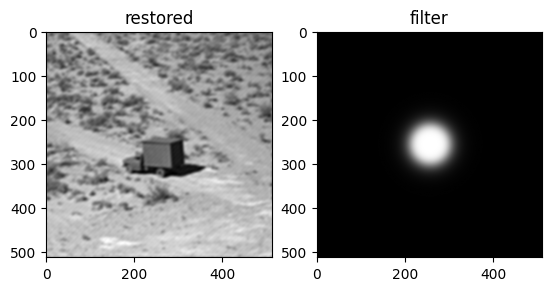

In [63]:
truck_filter = butterworth_filter(truck_noise_image.shape, 45, 3, 'low')
truck_noise_image_filtered_fourier_shift = truck_noise_image_fourier_shift * truck_filter
truck_noise_image_filtered_fourier = np.fft.ifftshift(truck_noise_image_filtered_fourier_shift)
truck_noise_image_filtered = np.fft.ifft2(truck_noise_image_filtered_fourier)
truck_noise_image_filtered = np.abs(truck_noise_image_filtered)
f_truck_noise_image, truck_noise_image_subplots = plt.subplots(ncols=2)
truck_noise_image_subplots[0].imshow(truck_noise_image_filtered, cmap='gray')
truck_noise_image_subplots[0].set_title("restored")
truck_noise_image_subplots[1].imshow(np.log1p(np.abs(truck_filter)), cmap='gray')
truck_noise_image_subplots[1].set_title("filter")

#### D)

In [64]:
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr

In [65]:
psnr = calculate_psnr(truck_image, truck_noise_image_filtered)
print(f"PSNR value of the restored image is {psnr}")

PSNR value of the restored image is 28.690692217733353
